In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from pyproj import Geod
from shapely import wkt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
assentamentos_federais_ce = gpd.read_file('assentamento_federal_ce.geojson', crs='EPSG:4326')

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [4]:
assentamentos = assentamentos_federais_ce.loc[(assentamentos_federais_ce.nome_proje == 'PA PATOS') | (assentamentos_federais_ce.nome_proje == 'PA PACHICU')]
assentamentos

,cd_sipra,uf,nome_proje,municipio,area_hecta,capacidade,num_famili,fase,data_de_cr,forma_obte,data_obten,area_calc_,sr,descricao_,geometry
185,CE0092000,CE,PA PACHICU,ITAREMA,619.6443,34,28,5,23/11/1995,Desapropriação,24/03/1995,613.49,None,None,"MULTIPOLYGON (((-39.72711 -2.99860, -39.72305 ..."
348,CE0097000,CE,PA PATOS,AMONTADA,1598.6423,30,30,5,12/12/1995,Desapropriação,26/12/1994,1599.67,None,None,"MULTIPOLYGON (((-39.68994 -3.03521, -39.69042 ..."


In [5]:
imovel_146 = pd.read_csv('imovel_irregular_146.csv')
imovel_146

,Marco,X_Este,Y_Norte,Lat,Lng,Confrontando,Azimute,Distância
0,1,"418.610,0029","9.669.427,0674","-2,9905242189790","-39,73240215",ASSOCIAÇÃO DOS PRODUTORES RURAIS DA FAZENDA PATOS,"213°32'49""","368,429"
1,2,"418.406,4010","9669120,00660","-2,9933007588199","-39,73423604",ASSOCIAÇÃO DOS PRODUTORES RURAIS DA FAZENDA PATOS,"120°43'53""","634,036"
2,3,"418.951,4011","9668796,00660","-2,9962350574347","-39,72933396",ASSOCIAÇÃO DOS PRODUTORES RURAIS DA FAZENDA PATOS,"191°57'24""","521,31"
3,4,"418.843,4010","9668286,00660","-3,0008480327824","-39,73030883",FRANCISCO DAS CHARGAS SALES,"114°07'56""","1.446,96"
4,5,"420.163,9070","9667694,42710","-3,0062075737095","-39,71843005",MANGUEZAL,"13°39'00""","474,989"
5,6,"420.276,0000","9668156,00000","-3,0020326899996","-39,717418669",MANGUEZAL,"100°24'28""","49,82"
6,7,"420.325,0000","9668147,00000","-3,0021143977676","-39,716977805",MANGUEZAL,"140°05'57""","230,723"
7,8,"420.473,0000","9667970,00000","-3,0037164790995","-39,715647098",ÁREA PRESUMIVEL DE MARINHA,"92°49'51""","567,61"
8,9,"421.039,9172","9667941,96860","-3,0039734062162","-39,710545955",ÁREA PRESUMIVEL DE MARINHA,"302°43'23""","965,825"
9,10,"420.227,3738","9668464,07150","-2,9992454788453","-39,717854404",ÁREA PRESUMIVEL DE MARINHA,"300°46'12""","1.882,35"


In [6]:
imovel_146['Lat'] = imovel_146['Lat'].apply(lambda x: float(x.replace(',','.')))
imovel_146['Lng'] = imovel_146['Lng'].apply(lambda x: float(x.replace(',','.')))
imovel_146['geometry'] = [Point(xy) for xy in zip(imovel_146.Lng, imovel_146.Lat)]

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


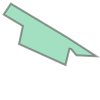

In [7]:
lat_list = imovel_146['Lat'].to_list()
lng_list = imovel_146['Lng'].to_list()
polygon_geom = Polygon(zip(lng_list, lat_list))
polygon_geom

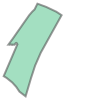

In [8]:
assentamentos.iloc[0].geometry

In [9]:
polygon_geom.intersects(assentamentos.iloc[0].geometry)

True

In [10]:
gdf_imovel_146 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[polygon_geom])
gdf_imovel_146

,geometry
0,"POLYGON ((-39.73240 -2.99052, -39.73424 -2.993..."


In [11]:
resultado =  gpd.sjoin(assentamentos, gdf_imovel_146)

In [12]:
resultado.iloc[1].geometry.area

0.001301363320369968

In [13]:
resultado

,cd_sipra,uf,nome_proje,municipio,area_hecta,capacidade,num_famili,fase,data_de_cr,forma_obte,data_obten,area_calc_,sr,descricao_,geometry,index_right
185,CE0092000,CE,PA PACHICU,ITAREMA,619.6443,34,28,5,23/11/1995,Desapropriação,24/03/1995,613.49,None,None,"MULTIPOLYGON (((-39.72711 -2.99860, -39.72305 ...",0
348,CE0097000,CE,PA PATOS,AMONTADA,1598.6423,30,30,5,12/12/1995,Desapropriação,26/12/1994,1599.67,None,None,"MULTIPOLYGON (((-39.68994 -3.03521, -39.69042 ...",0


In [14]:
gdf_imovel_146

,geometry
0,"POLYGON ((-39.73240 -2.99052, -39.73424 -2.993..."


In [15]:
gdf_imovel_146.geometry.intersection(assentamentos.iloc[0].geometry)

0    POLYGON ((-39.71843 -3.00621, -39.72873 -3.001...
dtype: geometry

In [16]:
gdf_imovel_146.geometry

0    POLYGON ((-39.73240 -2.99052, -39.73424 -2.993...
Name: geometry, dtype: geometry

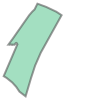

In [17]:
assentamentos.iloc[0].geometry

In [18]:
cruzamento1 = assentamentos.iloc[0].geometry.intersection(gdf_imovel_146.iloc[0].geometry)
cruzamento1 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[cruzamento1])
cruzamento1['intersecao_cd_sipra'] = assentamentos.iloc[0].cd_sipra
cruzamento1['intersecao_nome'] = assentamentos.iloc[0].nome_proje
cruzamento1

,geometry,intersecao_cd_sipra,intersecao_nome
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU


In [19]:
cruzamento2 = assentamentos.iloc[1].geometry.intersection(gdf_imovel_146.iloc[0].geometry)
cruzamento2 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[cruzamento2])
cruzamento2['intersecao_cd_sipra'] = assentamentos.iloc[1].cd_sipra
cruzamento2['intersecao_nome'] = assentamentos.iloc[1].nome_proje
cruzamento2

,geometry,intersecao_cd_sipra,intersecao_nome
0,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",CE0097000,PA PATOS


In [20]:
intersecoes = pd.concat([cruzamento1,cruzamento2])
intersecoes

,geometry,intersecao_cd_sipra,intersecao_nome
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU
0,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",CE0097000,PA PATOS


In [21]:
geod = Geod(ellps="WGS84")

In [22]:
def getArea(pol):
    return abs(geod.geometry_area_perimeter(pol)[0])

In [23]:
intersecoes.geometry.apply(lambda x: getArea(x)/10000)

0   47.17
0    0.32
Name: geometry, dtype: float64

In [24]:
intersecoes['intersecao_area_km2'] = intersecoes.geometry.apply(lambda x: getArea(x)/10000)

In [25]:
intersecoes['intersecao_imovel'] = '146'
intersecoes

,geometry,intersecao_cd_sipra,intersecao_nome,intersecao_area_km2,intersecao_imovel
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU,47.17,146
0,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",CE0097000,PA PATOS,0.32,146


In [26]:
imovel_297 = pd.read_csv('imovel_irregular_297.csv')
imovel_297

,ponto,x,y
0,1,421296,9667851
1,2,421399,9667416
2,3,421292,9667416
3,4,421134,9666927
4,5,420869,9667016
5,6,419569,9667596
6,7,418781,9667950
7,8,418889,9668460
8,9,418344,9668784
9,10,418651,9669247


In [27]:
lat_list = imovel_297['y'].to_list()
lng_list = imovel_297['x'].to_list()

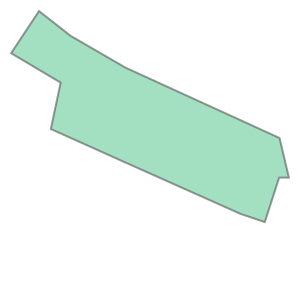

In [28]:
polygon_297 = Polygon(zip(lng_list, lat_list))
polygon_297

In [29]:
gdf_imovel_297 = gpd.GeoDataFrame(index=[0],crs='EPSG:31984', geometry=[polygon_297]).to_crs('epsg:4326')

In [30]:
gdf_imovel_297

,geometry
0,"POLYGON ((-39.70824 -3.00480, -39.70732 -3.008..."


In [31]:
cruzamento3 = assentamentos.iloc[0].geometry.intersection(gdf_imovel_297.iloc[0].geometry)
cruzamento3 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[cruzamento3])
cruzamento3['intersecao_cd_sipra'] = assentamentos.iloc[0].cd_sipra
cruzamento3['intersecao_nome'] = assentamentos.iloc[0].nome_proje
cruzamento3

,geometry,intersecao_cd_sipra,intersecao_nome
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU


In [32]:
cruzamento4 = assentamentos.iloc[1].geometry.intersection(gdf_imovel_297.iloc[0].geometry)
cruzamento4 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[cruzamento4])
cruzamento4['intersecao_cd_sipra'] = assentamentos.iloc[1].cd_sipra
cruzamento4['intersecao_nome'] = assentamentos.iloc[1].nome_proje
cruzamento4

,geometry,intersecao_cd_sipra,intersecao_nome
0,"POLYGON ((-39.71787 -3.00739, -39.71595 -3.003...",CE0097000,PA PATOS


In [33]:
resultado_intersecoes_297 = pd.concat([cruzamento3,cruzamento4])
resultado_intersecoes_297['intersecao_area_km2'] = resultado_intersecoes_297.geometry.apply(lambda x: getArea(x)/10000)
resultado_intersecoes_297['intersecao_imovel'] = '297'
resultado_intersecoes_297

,geometry,intersecao_cd_sipra,intersecao_nome,intersecao_area_km2,intersecao_imovel
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU,100.43,297
0,"POLYGON ((-39.71787 -3.00739, -39.71595 -3.003...",CE0097000,PA PATOS,87.65,297


In [34]:
intersecoes = pd.concat([intersecoes,resultado_intersecoes_297])
intersecoes

,geometry,intersecao_cd_sipra,intersecao_nome,intersecao_area_km2,intersecao_imovel
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU,47.17,146
0,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",CE0097000,PA PATOS,0.32,146
0,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",CE0092000,PA PACHICU,100.43,297
0,"POLYGON ((-39.71787 -3.00739, -39.71595 -3.003...",CE0097000,PA PATOS,87.65,297


In [35]:
intersecao_imv146_297 = gdf_imovel_146.iloc[0].geometry.intersection(gdf_imovel_297.iloc[0].geometry)
cruzamento5 = gpd.GeoDataFrame(index=[0],crs='EPSG:4326', geometry=[intersecao_imv146_297])
cruzamento5['categoria'] = 'Área de interseção'
cruzamento5['descricao'] = f'Área de interseção ({round(getArea(intersecao_imv146_297)/10000,2)}) entre os imóveis 146 e 297'


In [36]:
area_int = intersecoes.copy()
area_int['descricao'] = area_int.apply(lambda x: f'Interseção do imóvel {x["intersecao_imovel"]} com o assentamento {x["intersecao_nome"]}: {x["intersecao_area_km2"]} hectares', axis=1)
area_int = area_int[['descricao','geometry']]
area_int['categoria'] = 'Área de interseção'

area_int = pd.concat([area_int,cruzamento5])

area_int.to_file('resultados/interseções.geojson', driver ='GeoJSON')

area_int

,descricao,geometry,categoria
0,Interseção do imóvel 146 com o assentamento PA...,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",Área de interseção
0,Interseção do imóvel 146 com o assentamento PA...,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",Área de interseção
0,Interseção do imóvel 297 com o assentamento PA...,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",Área de interseção
0,Interseção do imóvel 297 com o assentamento PA...,"POLYGON ((-39.71787 -3.00739, -39.71595 -3.003...",Área de interseção
0,Área de interseção (113.25) entre os imóveis 1...,"POLYGON ((-39.72933 -2.99624, -39.73320 -2.993...",Área de interseção


In [37]:
area_ass = assentamentos.copy()
area_ass['descricao'] = area_ass.apply(lambda x: f'{x["nome_proje"]}. Criado em {x["data_de_cr"]}, {round(float(x["area_hecta"]),2)} km² e {x["num_famili"]} famílias', axis=1)
area_ass = area_ass[['descricao','geometry']]
area_ass['categoria'] = 'Assentamento'
area_ass

,descricao,geometry,categoria
185,"PA PACHICU. Criado em 23/11/1995, 619.64 km² e...","MULTIPOLYGON (((-39.72711 -2.99860, -39.72305 ...",Assentamento
348,"PA PATOS. Criado em 12/12/1995, 1598.64 km² e ...","MULTIPOLYGON (((-39.68994 -3.03521, -39.69042 ...",Assentamento


In [38]:
area_146 = gdf_imovel_146.copy()
area_146['descricao'] = "Inscrição Nº 146 - Segundo documento, área de 152 hectares foi negociada pela última vez em 2020 por R$ 160 mil. Terreno abrange a área dentro do manguezal onde foi aberta a estrada sem licenciamento."
area_146['categoria']="Imóvel"
area_146

,geometry,descricao,categoria
0,"POLYGON ((-39.73240 -2.99052, -39.73424 -2.993...","Inscrição Nº 146 - Segundo documento, área de ...",Imóvel


In [39]:
area_297 = gdf_imovel_297.copy()
area_297['descricao'] = "Inscrição Nº 297 - Área de 126,95 hectares teria sido negociada pela última vez em 2010. Avaliada à época em R$ 50 mil. Segundo documento, pertence a um empresário residente em Fortaleza que já foi investigado e responde a processo por fraude em financiamentos - valores de R$ 21 milhões - obtidos junto ao Banco do Nordeste do Brasil."
area_297['categoria']="Imóvel"
area_297

,geometry,descricao,categoria
0,"POLYGON ((-39.70824 -3.00480, -39.70732 -3.008...","Inscrição Nº 297 - Área de 126,95 hectares ter...",Imóvel


In [40]:
estradas = pd.read_csv('estradas.csv')

estradas['inicio'] = [Point(xy) for xy in zip(estradas.inicio_lng, estradas.inicio_lat)]
estradas['fim'] = [Point(xy) for xy in zip(estradas.fim_lng, estradas.fim_lat)]
estradas['geometry'] = estradas.apply(lambda row: LineString([row['inicio'], row['fim']]), axis=1)

estradas['descricao'] = estradas['nome'] + ': '+ estradas['descricao']
estradas['categoria'] = 'Estradas'

estradas = estradas[['descricao','categoria','geometry']]

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


In [41]:
gdf_estradas = gpd.GeoDataFrame(estradas,crs='EPSG:31984').to_crs('epsg:4326')
gdf_estradas

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,descricao,categoria,geometry
0,PISTA DO MANGUE: O local de abertura de estrad...,Estradas,"LINESTRING (-39.73129 -3.00397, -39.71863 -3.0..."
1,PISTA ÁREA DA FAIXA DE PRAIA: O outro local da...,Estradas,"LINESTRING (-39.73497 -2.99365, -39.73386 -2.9..."


In [42]:
gdf_completo = pd.concat([area_ass, area_146, area_297, area_int,gdf_estradas])


gdf_completo['lng'] = gdf_completo.geometry.apply(lambda p: "%.6f" %  p.centroid.x)
gdf_completo['lat'] = gdf_completo.geometry.apply(lambda p: "%.6f" %  p.centroid.y)

gdf_completo.insert(0, 'index', range(0, len(gdf_completo)))
gdf_completo = gdf_completo.reset_index( drop=True)
gdf_completo

,index,descricao,geometry,categoria,lng,lat
0,0,"PA PACHICU. Criado em 23/11/1995, 619.64 km² e...","MULTIPOLYGON (((-39.72711 -2.99860, -39.72305 ...",Assentamento,-39.730302,-3.018064
1,1,"PA PATOS. Criado em 12/12/1995, 1598.64 km² e ...","MULTIPOLYGON (((-39.68994 -3.03521, -39.69042 ...",Assentamento,-39.713326,-3.033359
2,2,"Inscrição Nº 146 - Segundo documento, área de ...","POLYGON ((-39.73240 -2.99052, -39.73424 -2.993...",Imóvel,-39.723925,-2.999156
3,3,"Inscrição Nº 297 - Área de 126,95 hectares ter...","POLYGON ((-39.70824 -3.00480, -39.70732 -3.008...",Imóvel,-39.720576,-3.003455
4,4,Interseção do imóvel 146 com o assentamento PA...,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",Área de interseção,-39.722889,-3.002264
5,5,Interseção do imóvel 146 com o assentamento PA...,"POLYGON ((-39.71106 -3.00364, -39.71055 -3.003...",Área de interseção,-39.711285,-3.003834
6,6,Interseção do imóvel 297 com o assentamento PA...,"POLYGON ((-39.72305 -3.00010, -39.71838 -3.002...",Área de interseção,-39.723087,-3.003863
7,7,Interseção do imóvel 297 com o assentamento PA...,"POLYGON ((-39.71787 -3.00739, -39.71595 -3.003...",Área de interseção,-39.712650,-3.007941
8,8,Área de interseção (113.25) entre os imóveis 1...,"POLYGON ((-39.72933 -2.99624, -39.73320 -2.993...",Área de interseção,-39.723512,-3.000276
9,9,PISTA DO MANGUE: O local de abertura de estrad...,"LINESTRING (-39.73129 -3.00397, -39.71863 -3.0...",Estradas,-39.724962,-3.006519


In [43]:
gdf_completo.to_file('resultados/dataset_completo.geojson', driver ='GeoJSON')

In [44]:
# Selecionando os outros assentamentos na região

assentamentos_federais_ce_itarema_amontada = assentamentos_federais_ce.loc[(assentamentos_federais_ce.municipio == 'ITAREMA')|(assentamentos_federais_ce.municipio == 'AMONTADA')]

assentamentos_federais_ce_itarema_amontada = assentamentos_federais_ce_itarema_amontada.loc[~(
    (assentamentos_federais_ce.nome_proje == 'PA PATOS') | (assentamentos_federais_ce.nome_proje == 'PA PACHICU')
    )]

assentamentos_federais_ce_itarema_amontada['lng'] = assentamentos_federais_ce_itarema_amontada.geometry.apply(lambda p: "%.6f" %  p.centroid.x)
assentamentos_federais_ce_itarema_amontada['lat'] = assentamentos_federais_ce_itarema_amontada.geometry.apply(lambda p: "%.6f" %  p.centroid.y)

assentamentos_federais_ce_itarema_amontada

,cd_sipra,uf,nome_proje,municipio,area_hecta,capacidade,num_famili,fase,data_de_cr,forma_obte,data_obten,area_calc_,sr,descricao_,geometry,lng,lat
34,CE0351000,CE,PA CÓRREGO NOVO,ITAREMA,1500.7780,25,22,5,28/08/2007,Desapropriação,12/12/2005,1534.90,None,None,"MULTIPOLYGON (((-39.94784 -3.01505, -39.94188 ...",-39.969719,-3.021816
49,CE0048000,CE,PA CAPIM AÇU,ITAREMA,1452.5905,46,52,6,20/10/1989,Desapropriação,15/08/1988,1451.29,None,None,"MULTIPOLYGON (((-39.97704 -3.09274, -39.96264 ...",-39.962977,-3.111622
59,CE0088000,CE,PA CÓRREGO DAS AROEIRAS,AMONTADA,1920.1004,64,46,6,28/09/1995,Desapropriação,12/01/1995,1921.23,None,None,"MULTIPOLYGON (((-39.84980 -3.22224, -39.83318 ...",-39.835365,-3.246047
68,CE0090000,CE,PA LAGOA DO CACHIMBO,AMONTADA,1085.7101,35,35,6,28/09/1995,Desapropriação,12/01/1995,1068.53,None,None,"MULTIPOLYGON (((-39.81329 -3.13211, -39.83820 ...",-39.818697,-3.111558
71,CE0025000,CE,PA SABIAGUABA,AMONTADA,718.9365,28,28,6,22/06/1987,Desapropriação,16/02/1987,718.88,None,None,"MULTIPOLYGON (((-39.55610 -3.09330, -39.55486 ...",-39.564236,-3.098053
80,CE0196000,CE,PA LAGOA DOS NEGROS/VOLTA,ITAREMA,3193.0697,92,81,5,22/12/1997,Desapropriação,04/08/1997,3179.36,None,None,"MULTIPOLYGON (((-39.94180 -3.03902, -39.93427 ...",-39.963710,-3.060799
81,CE0026000,CE,PA LAGOA DO MINEIRO,ITAREMA,5763.8271,135,128,6,13/07/1987,Desapropriação,26/06/1986,5767.34,None,None,"MULTIPOLYGON (((-39.78835 -3.01933, -39.78673 ...",-39.796962,-3.050461
102,CE0091000,CE,PA MUFUMBO,AMONTADA,1305.2419,42,17,6,23/11/1995,Desapropriação,24/03/1995,1312.74,None,None,"MULTIPOLYGON (((-39.96476 -3.40401, -39.95669 ...",-39.982201,-3.416894
148,CE0071000,CE,PA LAGOA DO JARDIM,AMONTADA,1416.7753,55,48,6,31/05/1995,Desapropriação,19/08/1993,1431.10,None,None,"MULTIPOLYGON (((-39.81329 -3.13211, -39.81288 ...",-39.790212,-3.118689
165,CE0239000,CE,PA MARRECAS,AMONTADA,4391.0230,93,78,6,18/12/1998,Desapropriação,02/09/1998,4393.40,None,None,"MULTIPOLYGON (((-39.95001 -3.37377, -39.94704 ...",-39.924655,-3.405632


In [45]:
assentamentos_federais_ce_itarema_amontada.to_file('resultados/outros_assentamentos.geojson', driver ='GeoJSON')